In [4]:
w,h,fps

(1920, 1080, 25)

In [4]:
_,frame = cap.read()
# Define region points
import numpy as np
region_points = [(400, 250), (450, 320), (1250, 280), (1000, 220)]

pts = np.array([[400, 250], [450, 320], 
                [1250, 280], [1000, 220]],
               np.int32)
 
pts = pts.reshape((-1, 1, 2))
# Blue color in BGR
color = (255, 0, 0)
 
# Line thickness of 2 px
thickness = 2
frame_copy = frame
image = cv2.polylines(frame_copy, [pts], True, color, thickness)

cv2.imshow('image', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

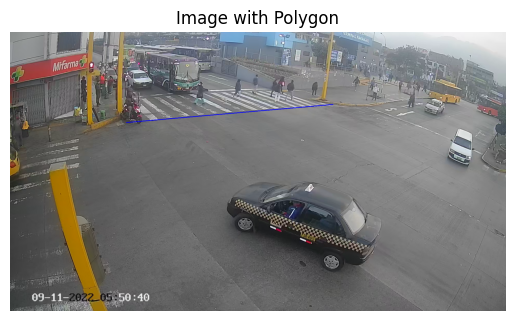

In [54]:


# Capture a frame from the video source (e.g., webcam)
cap = cv2.VideoCapture("../data/videos/video1.mp4")
ret, frame = cap.read()
cap.release()

if not ret:
    print("Failed to capture image")
    exit()

# Copy the frame
frame_copy = frame.copy()

# Define region points
pts = np.array([[450, 350], 
                [1250, 280]],
               np.int32)
 
pts = pts.reshape((-1, 1, 2))

# Blue color in BGR
color = (255, 0, 0)
 
# Line thickness of 2 px
thickness = 2

# Draw the polygon on the frame copy
frame_copy = cv2.polylines(frame_copy, [pts], True, color, thickness)

# Convert BGR image to RGB
frame_copy_rgb = cv2.cvtColor(frame_copy, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(frame_copy_rgb)
plt.title('Image with Polygon')
plt.axis('off')  # Hide axis
plt.show()


In [7]:

# Video writer
cap = cv2.VideoCapture("../data/videos/video1.mp4")

video_writer = cv2.VideoWriter("object_counting_output.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))
region_points = [(400, 250), (450, 320), (1250, 280), (1000, 220)]

# Init Object Counter
counter = solutions.ObjectCounter(
    view_img=True,
    reg_pts=region_points,
    classes_names=model.names,
    draw_tracks=True,
    line_thickness=2,
)

co = 0
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    tracks = model.track(im0, persist=True, show=False)

    im0 = counter.start_counting(im0, tracks)
    video_writer.write(im0)
    if co == 20:
        cv2.imwrite('test.jpg',im0)
        cap.release()
        video_writer.release()
        cv2.destroyAllWindows()

    co = co + 1

Polygon Counter Initiated.

0: 384x640 2 13_Buss, 1 5_Moto lineal, 1 10_Auto colectivo, 1 3_Taxi, 1133.8ms
Speed: 2.5ms preprocess, 1133.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 1_Auto Privado, 2 13_Buss, 1 5_Moto lineal, 1 10_Auto colectivo, 2 3_Taxis, 992.8ms
Speed: 3.6ms preprocess, 992.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 1_Auto Privado, 2 13_Buss, 1 5_Moto lineal, 1 10_Auto colectivo, 2 3_Taxis, 977.1ms
Speed: 2.4ms preprocess, 977.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 1_Auto Privado, 2 13_Buss, 1 5_Moto lineal, 1 10_Auto colectivo, 2 3_Taxis, 980.5ms
Speed: 2.1ms preprocess, 980.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 1_Auto Privado, 2 13_Buss, 1 5_Moto lineal, 1 10_Auto colectivo, 2 3_Taxis, 969.4ms
Speed: 2.3ms preprocess, 969.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x64

In [2]:
import cv2
import os
os.environ['QT_QPA_PLATFORM'] = 'xcb'

from ultralytics import YOLO, solutions
import cv2
import numpy as np
from matplotlib import pyplot as plt
model = YOLO("../data/models/best.pt")
cap = cv2.VideoCapture("../data/videos/test.mp4")
assert cap.isOpened(), "Error reading video file"
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

In [9]:
# Video writer
cap = cv2.VideoCapture("../data/videos/test.mp4")
region_points = [(400, 250), (450, 320), (1250, 280), (1000, 220)]

# Init Object Counter
counter = solutions.ObjectCounter(
    view_img=False,
    reg_pts=region_points,
    classes_names=model.names,
    draw_tracks=True,
    line_thickness=2,
)


Polygon Counter Initiated.


In [10]:
success, im0 = cap.read()
tracks = model.track(im0, persist=True, show=False)

im0 = counter.start_counting(im0, tracks)


0: 384x640 2 13_Buss, 2 11_Camioneta rurals, 1 5_Moto lineal, 1 14_Articulado, 1165.3ms
Speed: 4.4ms preprocess, 1165.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


In [11]:
co = 10
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Video frame is empty or video processing has been successfully completed.")
        break
    tracks = model.track(im0, persist=True, show=False)

    im0 = counter.start_counting(im0, tracks)


0: 384x640 2 13_Buss, 2 11_Camioneta rurals, 1 5_Moto lineal, 1 14_Articulado, 1014.3ms
Speed: 2.9ms preprocess, 1014.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 13_Buss, 2 11_Camioneta rurals, 1 5_Moto lineal, 1 14_Articulado, 981.8ms
Speed: 2.4ms preprocess, 981.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 13_Buss, 2 11_Camioneta rurals, 1 5_Moto lineal, 1 14_Articulado, 974.7ms
Speed: 2.1ms preprocess, 974.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 13_Buss, 2 11_Camioneta rurals, 1 5_Moto lineal, 1 14_Articulado, 993.1ms
Speed: 2.6ms preprocess, 993.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 13_Buss, 2 11_Camioneta rurals, 1 5_Moto lineal, 1 14_Articulado, 985.1ms
Speed: 2.9ms preprocess, 985.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 13_Buss, 2 11_Camioneta rurals, 1 5_Moto lineal, 1 14_

In [12]:
print(dir(counter))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'annotator', 'class_wise_count', 'cls_txtdisplay_gap', 'count_bg_color', 'count_ids', 'count_txt_color', 'count_txt_thickness', 'counting_region', 'display_frames', 'draw_tracks', 'env_check', 'extract_and_process_tracks', 'fontsize', 'im0', 'in_counts', 'is_drawing', 'line_dist_thresh', 'mouse_event_for_region', 'names', 'out_counts', 'reg_pts', 'region_color', 'region_thickness', 'selected_point', 'start_counting', 'tf', 'track_color', 'track_history', 'track_thickness', 'view_img', 'view_in_counts', 'view_out_counts', 'window_name']


In [55]:
counter.class_wise_count

{'13_Bus': {'IN': 2, 'OUT': 1},
 '14_Articulado': {'IN': 2, 'OUT': 0},
 '11_Camioneta rural': {'IN': 0, 'OUT': 3},
 '5_Moto lineal': {'IN': 1, 'OUT': 4},
 '1_Auto Privado': {'IN': 0, 'OUT': 1},
 '7_Scooter': {'IN': 0, 'OUT': 0},
 '3_Taxi': {'IN': 0, 'OUT': 0}}

In [47]:
counter.track_history.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 0, 50])

In [33]:
counter.names

{0: '1_Auto Privado',
 1: '13_Bus',
 2: '11_Camioneta rural',
 3: '12_Microbus',
 4: '4_Mototaxi',
 5: '5_Moto lineal',
 6: '9_Omnibus Interprovincial',
 7: '10_Auto colectivo',
 8: '14_Articulado',
 9: '2_Cam. PickUp',
 10: '3_Taxi',
 11: '6_Bicicletas',
 12: '7_Scooter',
 13: '8_TransportenEscolar Personal',
 14: '15_TC_Ligeros',
 15: '16_TC Pesados',
 16: '17_TC SemiTrailler Trailer',
 17: '18_Triciclo',
 18: '19_Ambulancia'}

In [37]:
counter.reg_pts

[(400, 250), (450, 320), (1250, 280), (1000, 220)]

TypeError: Image data of dtype object cannot be converted to float

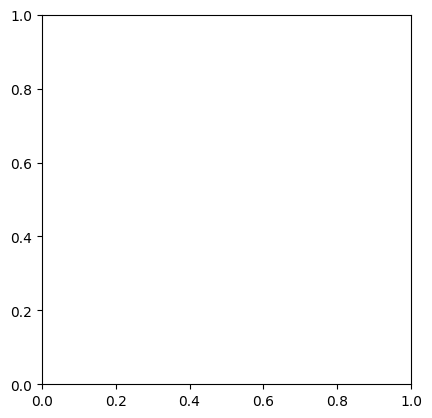

In [24]:
# Display the image using Matplotlib
plt.imshow(im0)
plt.title('Image with Polygon')
plt.axis('off')  # Hide axis
plt.show()